In [38]:
%load_ext autoreload
%autoreload 2
from feature_extractor import FeatureExtractor
from classifier import Classifier
from signal_manager import SignalMgr
from filter import Filter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

feaExtractor = FeatureExtractor()
# classifier = Classifier()
sigMgr = SignalMgr()

# norm_signal = sigMgr.normalize_signals(signals)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
def get_signal_list(root_path, file_name = 'Channel_1.csv'):
    test_suites = os.listdir(root_path)
    test_cases_path = []
    expect_result = []
    for test in test_suites:
        dir_path = os.path.join(root_path, test)
        if not os.path.isdir(dir_path):
            continue
        case_path = os.path.join(dir_path, file_name)
        if not os.path.isfile(case_path):
            continue
        test_cases_path.append(case_path)
        with open(case_path, 'r') as fhandler:
            ret = fhandler.readline().strip().split(',')[0]
            if int(ret) > 0:
                ret = 1
            else:
                ret = 0
            expect_result.append(ret)
    return (test_cases_path, expect_result)

In [40]:
import os, sys
## start evaluation of data
# TEST_LABEL = '/Users/changkong/ML/Signal Classification/testData/20180204/labels.csv'
RESULT_FPATH = '/Users/changkong/ML/Signal Classification/3_Application/label.csv'
# get all data from 
TEST_DATA_ROOT = "/Users/changkong/ML/Signal Classification/3_Application/Data/"

pathes, ret = get_signal_list(TEST_DATA_ROOT)

In [41]:
label_df = pd.read_csv(RESULT_FPATH, header=None, skiprows=1, names=['case_name', 'expect_result'], dtype={'expect_result':np.int32}).dropna()
# get features
label_df.loc[label_df.expect_result <= 1,'expect_result'] = 0
label_df.loc[label_df.expect_result > 1, 'expect_result']= 1
test_cases_df = pd.DataFrame(pathes, columns= ['case_path'])
test_cases_df['case_name'] = test_cases_df['case_path'].apply(lambda x: x.split('/')[-2])
test_cases_df['expect_result'] = ret
test_labels = test_cases_df.merge(label_df, on='case_name')

In [42]:
# label_df.head()
test_labels.head(100)

,case_path,case_name,expect_result_x,expect_result_y
0,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_090536,1,0
1,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_090637,0,1
2,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091016,0,0
3,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091047,0,0
4,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091103,0,0
5,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091138,0,0
6,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091155,0,0
7,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091224,0,0
8,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091237,0,0
9,/Users/changkong/ML/Signal Classification/3_Ap...,20180325_091316,0,0


In [43]:
sigMgr.process('/Users/changkong/ML/Signal Classification/testData/Data.20180426/不良品1欧姆测试/Data.20180426/20180426_153051/Channel_1.csv', request_param={'skip_row':[1], 'model_path':['/Users/changkong/ML/Signal Classification/project/model/ada.pkl']})

{'reason': -1, 'speed': 13916.015624999998, 'stat': 1}

In [44]:
f = sigMgr.get_features('/Users/changkong/ML/Signal Classification/3_Application/Data/20180325_090536/Channel_1.csv')

In [45]:
# sigMgr.process('/Users/changkong/Desktop/Data1615/20180325_090536/Channel_1.csv', request_param={'skip_row':[1], 'model_path':['/Users/changkong/ML/Signal Classification/project/model/ada.pkl']})

In [46]:
# dataset_df = pd.DataFrame()
pathes = test_labels['case_path']
# print pathes
feature_set = dict()
feature_set['peaks_num'] = list()
feature_set['down_peaks_num'] = list()
feature_set['up_edges_num'] = list()
feature_set['down_edges_num'] = list()
feature_set['peak_edge_ratio'] = list()
feature_set['down_peak_edge_ratio'] = list()
feature_set['edge_diff_10'] = list()
feature_set['edge_diff_20'] = list()
# feature_set['edge_diff_30'] = list()
feature_set['edge_diff_50'] = list()
feature_set['width_diff_10'] = list()
feature_set['negative_peak_num'] = list()
# feature_set['width_diff_20'] = list()
# feature_set['width_diff_30'] = list()
# feature_set['width_diff_50'] = list()
for test_case in pathes:
    features = sigMgr.get_features(test_case, request_param={'skip_row':[1], 'model_path':'train'})
    feature_set['peaks_num'].append(features['peaks_num'])
    feature_set['up_edges_num'].append(features['up_edges_num'])
    feature_set['down_edges_num'].append(features['down_edges_num'])
    feature_set['down_peaks_num'].append(features['down_peaks_num'])
    feature_set['peak_edge_ratio'].append(features['peak_edge_ratio'])
    feature_set['down_peak_edge_ratio'].append(features['down_peak_edge_ratio'])
    feature_set['edge_diff_10'].append(features['edge_diff_10'])
    feature_set['edge_diff_20'].append(features['edge_diff_20'])
#     feature_set['edge_diff_30'].append(features['edge_diff_30'])
    feature_set['edge_diff_50'].append(features['edge_diff_50'])
    feature_set['width_diff_10'].append(features['width_diff_10'])
    feature_set['negative_peak_num'].append(features['negative_peak_num'])
#     feature_set['width_diff_20'].append(features['width_diff_20'])
#     feature_set['width_diff_30'].append(features['width_diff_30'])
#     feature_set['width_diff_50'].append(features['width_diff_50'])

dataset = pd.DataFrame(feature_set)

In [2]:
dataset.head()

NameError: name 'dataset' is not defined

In [49]:
mask = dataset.negative_peak_num > 0

In [63]:
from sklearn.cross_validation import train_test_split

msk = np.random.rand(len(dataset)) < 0.8
label = dataset['label']

# x = dataset.drop('label', axis=1)
# train_x = x[msk].reset_index(drop=True)
# test_x = x[~msk].reset_index(drop=True)
# train_y = label[msk].reset_index(drop=True)
# test_y = label[~msk].reset_index(drop=True)
x = dataset.drop('label', axis=1)
train_x = x[msk]
test_x = x[~msk]
train_y = label[msk]
test_y = label[~msk]

In [71]:
train_x = x[msk]
test_x = x[~msk]
train_y = label[msk]
test_y = label[~msk]

In [72]:
from sklearn.ensemble import AdaBoostClassifier as ada
from sklearn.metrics import classification_report

# train_new_x = train_x.drop(['width_diff_20', 'width_diff_30', 'edge_diff_30'], axis=1)
# test_new_x = test_x.drop(['width_diff_20', 'width_diff_30','edge_diff_30'], axis=1)
train_new_x = train_x
test_new_x = test_x
adaModel = ada(n_estimators=100, learning_rate = 0.7, random_state=10)
adaModel.fit(train_new_x, train_y)
pResult = adaModel.predict(test_new_x)
# possiblities = adaModel.predict_proba(test_x)
# pResult = [int(p0 < p1 + 0.011) for p0, p1 in possiblities]
# pResult = possiblities.where(possiblities >= 0.6, 1, 0)
print(classification_report(test_y, pResult))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91      1106
          1       0.79      0.66      0.72       398

avg / total       0.86      0.86      0.86      1504



In [52]:
# adaModel.predict(train_x.head(1))

array([0], dtype=int32)

0.827134306735


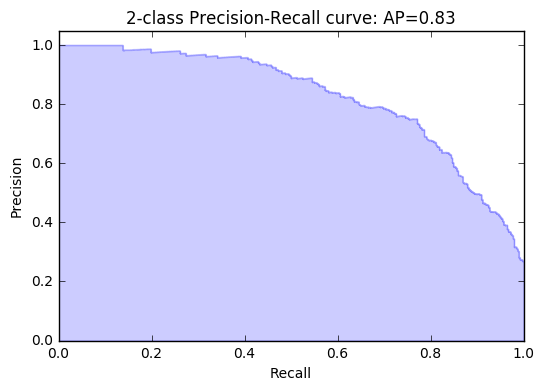

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from matplotlib import pyplot as plt

%matplotlib inline
score_y = adaModel.predict_proba(test_x)[:,1]
# average_precision
average_precision = average_precision_score(test_y, score_y)
print average_precision
# precision, recall
precision, recall, _ = precision_recall_curve(test_y, score_y)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [74]:
predict_possibility = adaModel.predict_proba(test_x)

In [75]:
predict_possibility[:,1]

array([ 0.48883564,  0.48868173,  0.49599122, ...,  0.51010195,
        0.4834575 ,  0.48157739])

In [76]:
adaModel.predict(test_x.head(1))

array([0], dtype=int32)

In [77]:
from sklearn.externals import joblib
joblib.dump(adaModel, '../model/ada.pkl')

['../model/ada.pkl']

In [58]:
%pwd

u'/Users/changkong/ML/Signal Classification/project/script'

In [78]:
joblib.load('../model/ada.pkl') 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.7, n_estimators=100, random_state=10)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gdbtModel = GradientBoostingClassifier()
gdbtModel.fit(train_x, train_y)
pResult = gdbtModel.predict(test_x)
print(classification_report(test_y, pResult))

             precision    recall  f1-score   support

          0       0.89      0.94      0.92      1106
          1       0.81      0.69      0.75       398

avg / total       0.87      0.88      0.87      1504



In [90]:
joblib.dump(adaModel, '../model/xgb.pkl')

['../model/xgb.pkl']